  
1
Machine Learning Basics - Set 2:  
Decision Trees, Fisher Discriminant and Feature Transformation  
Datasets: A (from Set 1), B: Similar to dataset A, but not linearly separable unless we apply a transformation
before.  

1. Two-layer Decision Tree:  
a) Visualize Dataset A and propose two sequential cuts to separate the classes.  


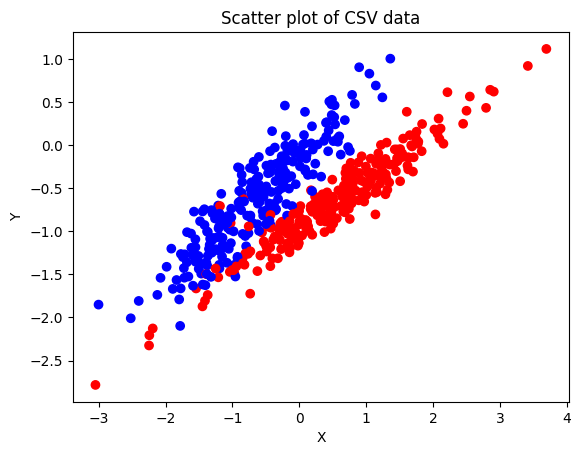

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt

data_A = pd.read_csv("dataA.csv", header=None)
data_B = pd.read_csv("dataB.csv", header=None)

def plot_data(data, color = None):
    if color == None: color = data[2]

    plt.scatter(data[0], data[1], c=color, cmap='bwr')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot of CSV data')
    plt.show()

plot_data(data_A)
#plot_data(data_B)


b) Implement your two-layer decision tree and classify each data point.  

Index([0, 1, 2, 'two_cut_classifier'], dtype='object')


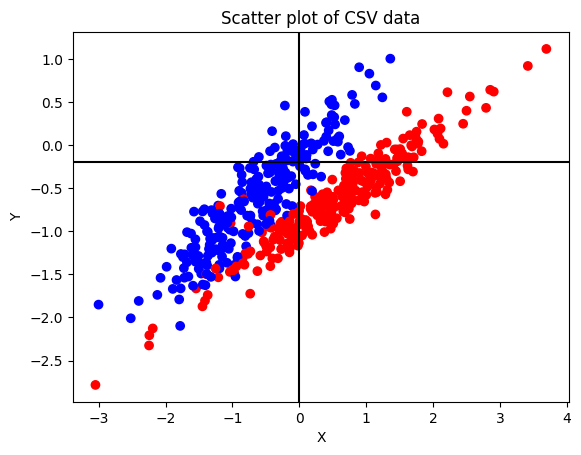

C:\Users\Admin\AppData\Local\Temp\ipykernel_7204\3754732364.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[0], data[1], c=color, cmap='bwr')


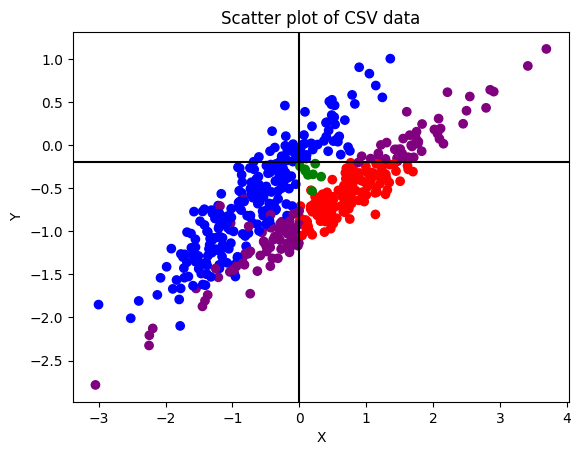

In [38]:
yCut = -0.2
xCut = 0.0 


def classify(data_A, yCut, xCut):
    # Loop through the DataFrame and classify each row
    for index, row in data_A.iterrows():
        if row[1] > yCut:
            data_A.at[index, 'two_cut_classifier'] = 0
        else:
            if row[0] > xCut:
                data_A.at[index, 'two_cut_classifier'] = 1
            else:
                data_A.at[index, 'two_cut_classifier'] = 0

# Initialize the column
data_A['two_cut_classifier'] = None

# Call classify to modify the dataframe
classify(data_A, yCut, xCut)

print(data_A.columns)

# print horizontal line at yCut and vertical line at xCut
plt.axhline(y=yCut, color='black', linestyle='-')
plt.axvline(x=xCut, color='black', linestyle='-')
plot_data(data_A)

def plot_two_cut(data_A, col_name):
    color_list = []
    for index, row in data_A.iterrows():
        if row[2] == row[col_name]:  # Assuming row[2] is the column you're comparing to
            color_list.append('red' if row[2] == 1 else 'blue')
        else:
            color_list.append('purple' if row[2] == 1 else 'green')
    return color_list


plt.axhline(y=yCut, color='black', linestyle='-')
plt.axvline(x=xCut, color='black', linestyle='-')
plot_data(data_A, plot_two_cut(data_A, 'two_cut_classifier'))


c) Calculate and report the signal efficiency and background rejection efficiency.


In [24]:
# get number of rows with column 2 equal to 1 vs get the number of rows with column 2 equal to 1 and column 'two_cut_classifier' equal to 1
def get_correct_ratio(data_A, val, col_name):
    total = 0

    correct = 0
    for index, row in data_A.iterrows():
        if row[2] == val:
            total += 1
            if row[col_name] == val:
                correct += 1

    return correct / total

def signal_efficiency(data_A, col_name):
    return get_correct_ratio(data_A, 1, col_name)

def background_efficiency(data_A, col_name):
    return get_correct_ratio(data_A, 0, col_name)

def report_efficiencies(data_A, col_name):

    sig = signal_efficiency(data_A, col_name)
    bac = background_efficiency(data_A, col_name)

    return f"Signal efficiency: {sig* 100:.2f}%, Bakcground_efficiency: {bac* 100:.2f}%"
report_efficiencies(data_A, 'two_cut_classifier')

'Signal efficiency: 51.57%, Bakcground_efficiency: 96.75%'

d) Discuss how you decided on the order of your cuts and potential limitations of this approach.  

We tried to optimize for background efficiency and just grab the densest part of signal. We will now try the opposite.

C:\Users\Admin\AppData\Local\Temp\ipykernel_7204\3754732364.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[0], data[1], c=color, cmap='bwr')


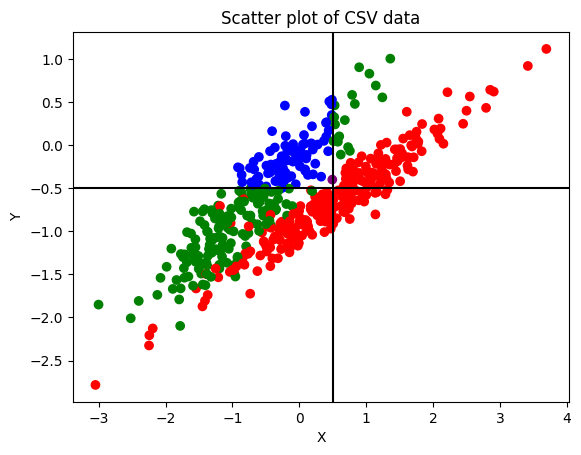

Signal efficiency: 99.61%, Bakcground_efficiency: 34.15%


In [35]:
yCut2 = -0.5
xCut2 = 0.5

data_A['two_cut_classifier2'] = None

def classify2(data_A, yCut2, xCut2):
    # Loop through the DataFrame and classify each row
    for index, row in data_A.iterrows():
        if row[1] < yCut2:
            data_A.at[index, 'two_cut_classifier2'] = 1
        else:
            if row[0] > xCut2:
                data_A.at[index, 'two_cut_classifier2'] = 1
            else:
                data_A.at[index, 'two_cut_classifier2'] = 0

# Call classify2 to modify the dataframe
classify2(data_A, yCut2, xCut2)

# Plot the results
plt.axhline(y=yCut2, color='black', linestyle='-')
plt.axvline(x=xCut2, color='black', linestyle='-')
plot_data(data_A, plot_two_cut(data_A, 'two_cut_classifier2'))

# Report the efficiencies
print(report_efficiencies(data_A, 'two_cut_classifier2'))

2. Fisher Discriminant:  
a) Calculate the mean vectors E(x|S) and E(x|B) for signal and background classes in Dataset A.  

In [42]:
red_signal = data_A[data_A[2] == 1]
blue_background = data_A[data_A[2] == 0]

mean_signal = red_signal.mean()
mean_background = blue_background.mean()

mean_signal = {'X': mean_signal[0], 'Y': mean_signal[1]}
mean_background = {'X': mean_background[0], 'Y': mean_background[1]}

print(mean_signal, mean_background)

{'X': 0.5304160007595259, 'Y': -0.6404668777224702} {'X': -0.6519098924012785, 'Y': -0.6390104269839287}


b) Compute the sum of variances matrix V= V(x|S) + V(x|B).  

In [43]:
def variance(arr, mean=None):
    if mean is None:
        mean = arr.mean()
    
    return sum([(el-mean)**2 for el in arr])/len(arr)

var_signal = {'X': variance(red_signal[0], mean_signal['X']), 'Y': variance(red_signal[1], mean_signal['Y'])}
var_background = {'X': variance(blue_background[0], mean_background['X']), 'Y': variance(blue_background[1], mean_background['Y'])}

print(var_signal, var_background)

{'X': 0.9778464413851797, 'Y': 0.2933416263110531} {'X': 0.5639977995014903, 'Y': 0.3544021528057799}



c) Calculate the Fisher Discriminant vector w = (E(x|S) −E(x|B))2/V, which minimises J(w).  


In [48]:
difference_of_means_squared = {key: (mean_signal[key] - mean_background[key]) for key in mean_signal.keys()}

sum_of_variances = {key: var_signal[key] + var_background[key] for key in var_signal.keys()}


fisher_discriminant = {key: difference_of_means_squared[key]/sum_of_variances[key] for key in difference_of_means_squared.keys()}
fisher_discriminant

{'X': 0.7668257673556462, 'Y': -0.0022484982264550702}

d) Project the data points onto the Fisher Discriminant axis and visualize the results with an histogram.  


3. Fisher Discriminant Classification:  
a) Determine a suitable threshold for classification based on the projected data.  
b) Implement the Fisher Discriminant classifier and evaluate its performance on Dataset A.  
c) Compare the performance of the Fisher Discriminant to the methods used in Set 1.  
  
4. Feature Transformation:  
a) Analyze Dataset B and identify why the standard Fisher Discriminant might fail.  
b) Propose a feature transformation that could improve class separation. Justify your choice.  
c) Implement your feature transformation and visualize the transformed data.  
d) Apply the Fisher Discriminant to the transformed data and compare its performance to the non-  
transformed case.  
  
5. *Advanced Analysis:  
a) Implement a function to perform k-fold cross-validation (with k=5) for your classifiers.  
b) Use cross-validation to compare the robustness of the decision tree, original Fisher Discriminant, and  
transformed Fisher Discriminant methods.  
c) Discuss the strengths and weaknesses of each method based on your cross-validation results.  
d) Implement Principal Component Analysis (PCA) as an automated feature transformation method:  
    •Calculate the covariance matrix of the dataset.  
    •Compute the eigenvectors and eigenvalues of the covariance matrix.  
    •Sort the eigenvectors by decreasing eigenvalues and select the top k eigenvectors.  
    •Project the data onto the selected eigenvectors.  
e) Apply PCA to Dataset B, reducing it to 2 principal components. Visualize the transformed data.  
f) Use the Fisher Discriminant on the PCA-transformed data. Compare its performance to your previous  
results.  
g) Discuss the benefits and limitations of using PCA for feature transformation in this context.  
Note: If you complete these problems quickly, feel free to move on to Set 3  .
